
0: 448x640 5 faces, 83.0ms
Speed: 3.5ms preprocess, 83.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
class_id: 0 conf: 0.7633535861968994
class_id: 0 conf: 0.7626631259918213
class_id: 0 conf: 0.7320590615272522
class_id: 0 conf: 0.7043290734291077
class_id: 0 conf: 0.6658744812011719


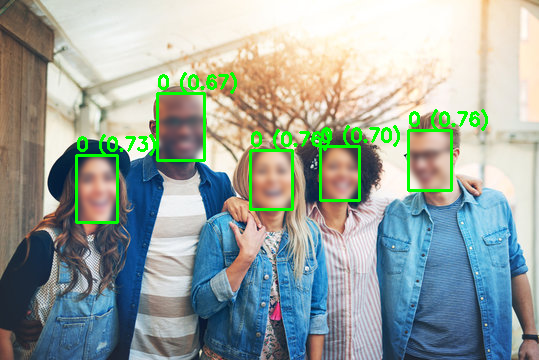

In [8]:
import sys
import os

# Ensure the project root (the directory that contains 'src') is on sys.path
def _find_project_root_with_src(start_path=None):
    p = os.path.abspath(start_path or os.getcwd())
    while True:
        if os.path.isdir(os.path.join(p, 'src')):
            return p
        parent = os.path.dirname(p)
        if parent == p:
            return None
        p = parent

_project_root = _find_project_root_with_src()
if _project_root and _project_root not in sys.path:
    sys.path.insert(0, _project_root)

from src.anonymizers.gaussian_blur import apply_gaussian_blur
from PIL import Image
from IPython.display import display
from src.detectors.yolov8_detector import YoloV8Detector
from src.utils.draw_utils import draw_boxes

import cv2
import numpy as np

def cv2_imshow(img):
    if img is None:
        return
    # If a NumPy/OpenCV image, convert BGR->RGB and display via PIL
    if isinstance(img, np.ndarray):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(img_rgb))
    else:
        display(img)

img_path = "C:/Users/giova/OneDrive/Desktop/tesi/project/data/input/images/test.jpg"
img = cv2.imread(img_path)
#cv2_imshow(img)

detector = YoloV8Detector(
    model_path="C:/Users/giova/OneDrive/Desktop/tesi/project/models/yolov8/yolov8n-face.pt",
    conf_threshold=0.5,
    device="cpu",
    classes=[0]        # [0] solo 'face'
)

detections = detector.detect(img)
#print(detections)
for d in detections:
    print("class_id:", d.class_id, "conf:", d.confidence)

# per ogni faccia trovata
for det in detections:
    box = [det.x1, det.y1, det.x2, det.y2]
    img = apply_gaussian_blur(img, box)


boxed = draw_boxes(img, detections)
cv2_imshow(boxed)